In [1]:
from array import array
import numpy as np
import math

# Initial Conditions
speed = 0.0
theta = 0.0
y1 = 20000.0


# Other constants
Cd = 0.35 # drag coefficient
area = 1.47 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 80.0 # mass in kg

# Atmospheric constants
T0=288.15
L=0.0065
M=0.0289644
R=8.31447
p0=101325.0
Re=6.4E6

# Atmospheric variation of gravity, pressure, temperature, density
glocal = grav*math.pow((Re/(Re+y1)),2)
pressure = p0*pow((1.0-L*y1/T0),(glocal*M/(R*L)))
temperature = T0 - L*y1
rho = pressure*M/(R*temperature)
air_const = -0.5*Cd*rho*area/mass

Pi = math.pi

In [2]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(0)

In [3]:
tau = 0.001 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
vplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
vNoAir = array('d')
time = array('d')
timeNoAir = array('d')

In [4]:
endtime = 0
nelements = 0
for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    vplot.append(v[1])
    t = (iStep-1)*tau
    timeNoAir.append(t)
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    vNoAir.append(v[1]-glocal*t)
    normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
    accel[0]=air_const*normV*v[0]
    accel[1]=air_const*normV*v[1]-glocal
    
    r[0] = r[0] + tau*v[0]
    r[1] = r[1] + tau*v[1]
    v[0] = v[0] + tau*accel[0]
    v[1] = v[1] + tau*accel[1]
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    
    time.append(tau*(iStep-1))
    
    glocal = grav*math.pow((Re/(Re+r[1])),2)
    pressure = p0*pow((1.0-L*r[1]/T0),(glocal*M/(R*L)))
    temperature = T0 - L*r[1]
    rho = pressure*M/(R*temperature)
    air_const = -0.5*Cd*rho*area/mass
    
    if (r[1] < 2400):
        xplot.append(r[0])
        yplot.append(r[1])
        vplot.append(v[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
print ("Maximum range is %f meters." % r[0])
print ("Time of flight is %f seconds." % endtime)

max_y = np.amax(yNoAir)+1
max_x = np.amax(xNoAir)+1
max_t = np.amax(time)+1
max_v = np.amax(vplot)+1
min_v = np.amin(vplot)+1

print ("Max y = %f" % max_y)
print ("Number of elements = %d" % nelements)

Maximum range is 0.000000 meters.
Time of flight is 202.146000 seconds.
Max y = 20001.000000
Number of elements = 202146


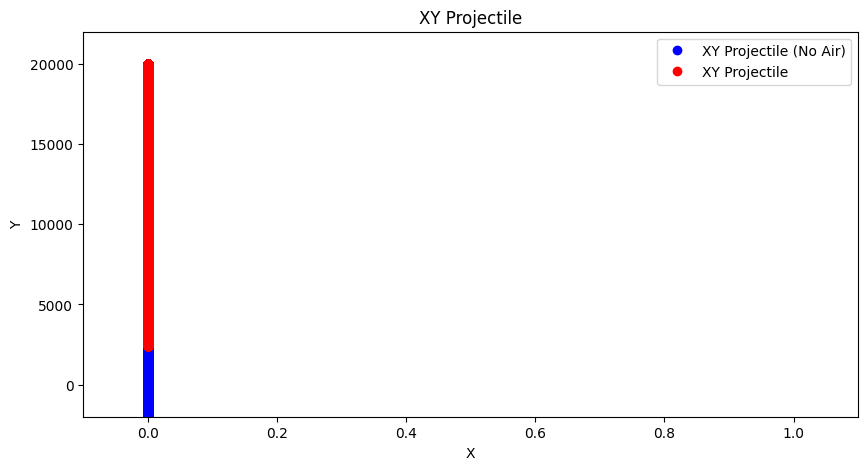

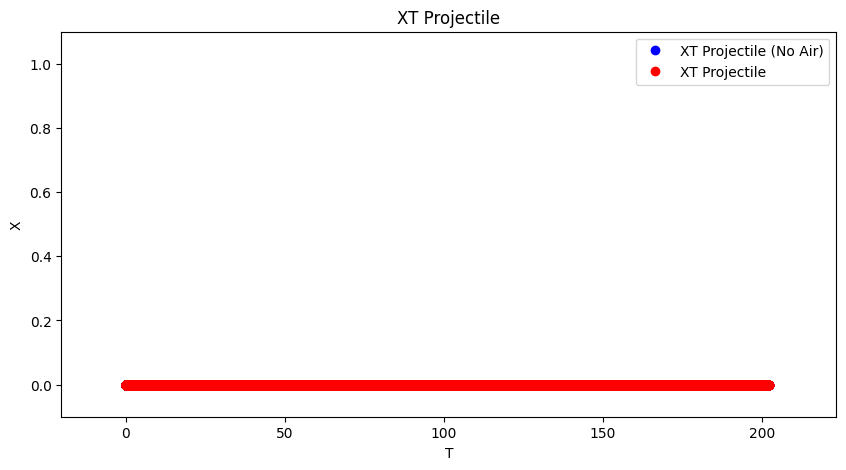

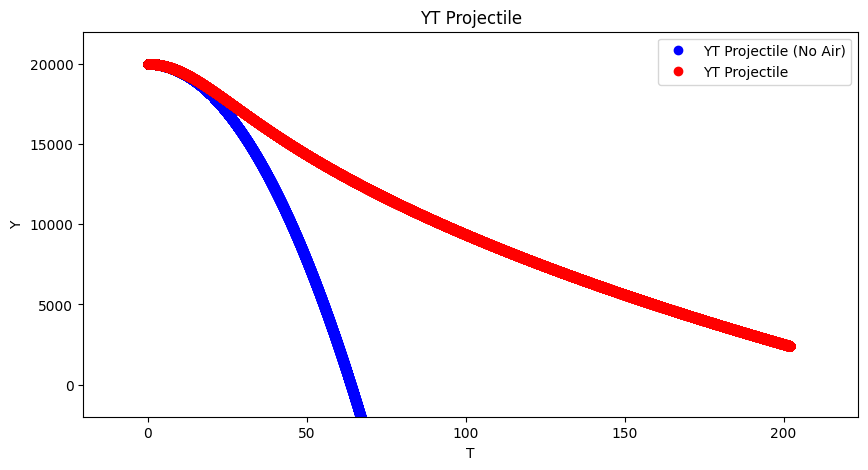

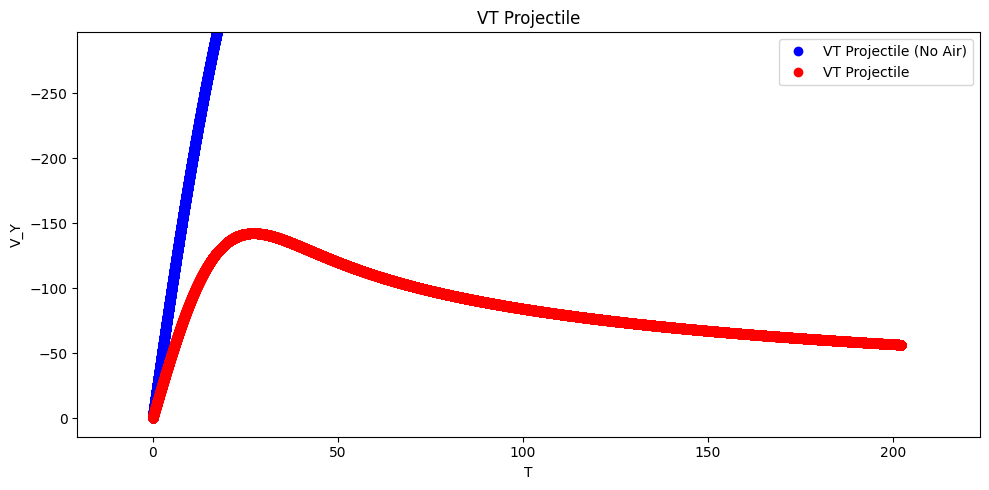

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, YT projectile plot, and VT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig4, ax4 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xNoAir, yNoAir, 'bo', label='XY Projectile (No Air)')
ax1.plot(xplot, yplot, 'ro', label='XY Projectile')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-0.1 * max_x, 1.1 * max_x)
ax1.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax1.legend()

# Plot the XT projectile data
ax2.plot(timeNoAir, xNoAir, 'bo', label='XT Projectile (No Air)')
ax2.plot(time, xplot, 'ro', label='XT Projectile')
ax2.set_title('XT Projectile')
ax2.set_xlabel('T')
ax2.set_ylabel('X')
ax2.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax2.set_ylim(-0.1 * max_x, 1.1 * max_x)
ax2.legend()

# Plot the YT projectile data
ax3.plot(timeNoAir, yNoAir, 'bo', label='YT Projectile (No Air)')
ax3.plot(time, yplot, 'ro', label='YT Projectile')
ax3.set_title('YT Projectile')
ax3.set_xlabel('T')
ax3.set_ylabel('Y')
ax3.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax3.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax3.legend()

# Plot the VT projectile data
ax4.plot(timeNoAir, vNoAir, 'bo', label='VT Projectile (No Air)')
ax4.plot(time, vplot, 'ro', label='VT Projectile')
ax4.set_title('VT Projectile')
ax4.set_xlabel('T')
ax4.set_ylabel('V_Y')
ax4.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax4.set_ylim(-0.1 * min_v, 2.1 * min_v)
ax4.legend()

# Show the plots
plt.tight_layout()
plt.show()
